In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
plt.rcParams["figure.figsize"] = (12,7)
plt.rcParams['font.size'] = '13'


v = 15.01 m/s
tan = 5.68 
h = 10.01 m
g = 9.81 m/s^2



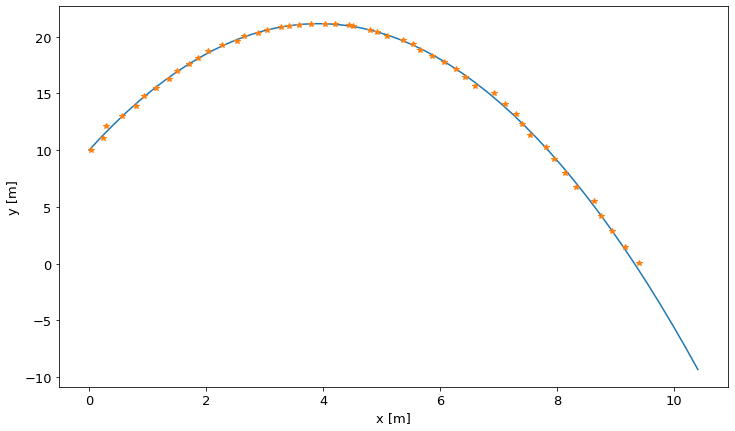

In [3]:
# 1
data = np.genfromtxt('./data/Data1.dat',dtype=None,delimiter=',')
t = data[0]; x = data[1]; y = data[2]

def xfun(t,vx):
    return t*vx

def yfun(t,vy,h,g):
    return h + t*vy - 0.5*g*t**2

xparm, xcov = curve_fit(xfun, t, x, p0=[3])
yparm, ycov = curve_fit(yfun, t, y, p0=[14,10,9.8])

tt = np.linspace(0,4,50)
xx = xfun(tt,xparm[0])
yy = yfun(tt,yparm[0],yparm[1],yparm[2])

print(f"""
v = {round((xparm[0]**2+yparm[0]**2)**0.5,2)} m/s
tan = {round(yparm[0]/xparm[0],2)} 
h = {round(yparm[1],2)} m
g = {round(yparm[2],2)} m/s^2
""")

plt.plot(xx,yy,'-',label='fitting')
plt.plot(x,y,'*',label='data')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.show()

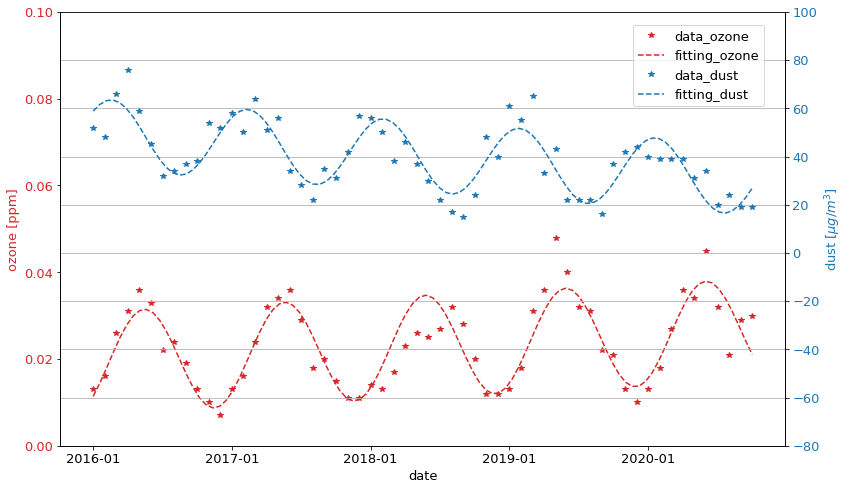

In [4]:
# 2
data = np.genfromtxt('./data/air_pollution.csv',dtype=None,delimiter=',', encoding='UTF-8')

date = data[1:,0]
ozone = np.array(data[1:,1],dtype=float)
dust = np.array(data[1:,2],dtype=int)

def fun(x,A,k,phi,p,a):
    return A*np.sin(k*x+phi)+p + a*x

x = np.linspace(0,10,len(date))
xx = np.linspace(0,10,100)


ozone_parm, xcov = curve_fit(fun, x, ozone, p0=[1,3,0,0.02,0])
ozone_fit = fun(xx,ozone_parm[0],ozone_parm[1],ozone_parm[2],ozone_parm[3],ozone_parm[4])

dust_parm, xcov = curve_fit(fun, x, dust, p0=[15,3,0,40,0])
dust_fit = fun(xx,dust_parm[0],dust_parm[1],dust_parm[2],dust_parm[3],dust_parm[4])

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('date')
ax1.set_ylabel('ozone [ppm]', color=color)
ax1.plot(x, ozone, '*', color=color, label='data_ozone')
ax1.plot(xx, ozone_fit, '--', color=color, label='fitting_ozone')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks([0,120/57,240/57,360/57,480/57]) 
ax1.set_xticklabels(labels=['2016-01','2017-01','2018-01','2019-01','2020-01'])
ax1.set_ylim([0,0.1])

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel(r'dust [$\mu g/m^3$]', color=color)
ax2.plot(x, dust, '*', color=color, label='data_dust')
ax2.plot(xx, dust_fit, '--', color=color, label='fitting_dust')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([-80,100])


fig.tight_layout()
fig.legend(bbox_to_anchor=(0.9, 0.95))
plt.grid()
plt.show()

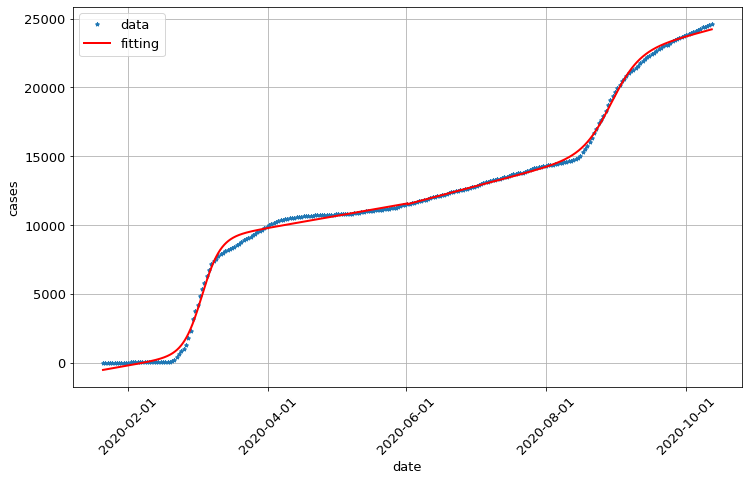

(array([4.10561284e+03, 3.30313690e+01, 1.62390632e-01, 7.77222796e+03,
        3.57827562e+03]),
 array([-3.44576147e+03, -2.15707680e+01,  8.34829411e-01,  1.16378790e+04,
         9.14022401e+03]))

In [5]:
# 3
data = np.genfromtxt('./data/covid.csv',dtype=None,delimiter=',', encoding='UTF-8')

date = data[1:,0]
cases = np.array(data[1:,1],dtype=int)
n = len(date)

def fun(x,a,b,c,d,e):
    return a*np.tanh(b*(x-c))+d*x+e
    
x = np.linspace(0,1,n)
parm1, xcov1 = curve_fit(fun, x[:int(n/2)], cases[:int(n/2)], maxfev=1000,p0 =[4000,30,0.2,1,400])
parm2, xcov2 = curve_fit(fun, x[int(n/2):], cases[int(n/2):], maxfev=1000,p0 =[1000,100,0.8,10,1000])

xx = np.linspace(0,1,10*n)
fit1 = fun(xx[:5*n],parm1[0],parm1[1],parm1[2],parm1[3],parm1[4])
fit2 = fun(xx[5*n:],parm2[0],parm2[1],parm2[2],parm2[3],parm2[4])

plt.plot(x,cases,'*',label='data',ms=4)
plt.plot(xx[:5*n],fit1,'r-',label='fitting',lw=2)
plt.plot(xx[5*n:],fit2,'r-',lw=2)
plt.xlabel('date')
plt.ylabel('cases')
plt.legend()
plt.xticks([11/n,72/n,132/n,193/n,254/n],
           labels=['2020-02-01','2020-04-01','2020-06-01','2020-08-01','2020-10-01'],
           rotation=45)
plt.grid()
plt.show()

parm1, parm2


k = 1.0019539151230819 kg/s^2
b = 0.07214341854642767 kg/s



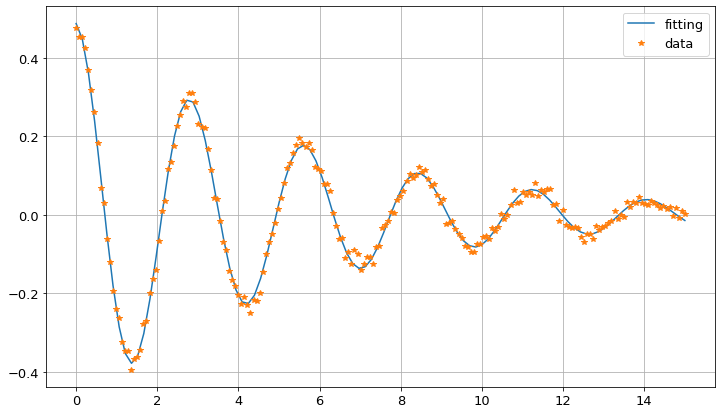

In [6]:
# 4
data = np.genfromtxt('./data/Data.dat',dtype=None,delimiter=',')
t = data[0]; x = data[1]

m = 0.2;

def fun(t,A,k,b,phi):
    return A*np.exp(-b/(2*m)*t)*np.sin((k/m-(b/(2*m))**2)**0.5*t+phi)

parm, cov = curve_fit(fun, t, x, p0=[0.4,1,0,0])

tt = np.linspace(0,15,100)
xx = fun(tt, parm[0], parm[1], parm[2], parm[3])

print(f"""
k = {parm[1]} kg/s^2
b = {parm[2]} kg/s
""")

plt.plot(tt,xx,'-',label='fitting')
plt.plot(data[0],data[1],'*',label='data')
plt.legend()
plt.grid()
plt.show()